In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA as sklearn_PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Custom Implementation of PCA on MNIST Dataset

In [6]:
def customPCA(X, dimensionsToKeep = 3):
    covarianceMat = np.cov(X.T)
    eigenValues, eigenVectors = np.linalg.eigh(covarianceMat)

    sorted_indices = np.argsort(eigenValues)[::-1]
    eigenVectors = eigenVectors[:, sorted_indices]

    top_eigenvectors = eigenVectors[:, :dimensionsToKeep]
    
    X_pca = X.dot(top_eigenvectors)
    
    total_variance = np.sum(eigenValues)
    explained_variance = eigenValues[sorted_indices] / total_variance
    
    return X_pca, top_eigenvectors, eigenValues[sorted_indices], explained_variance
    

In [7]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target.astype(int)

X_centered = X - np.mean(X, axis=0)

X_train_pca_5_custom, eigenvectors_5_custom, eigenvalues_5_custom, explained_variance_5_custom = customPCA(X_centered, dimensionsToKeep=5)
X_train_pca_20_custom, eigenvectors_20_custom, eigenvalues_20_custom, explained_variance_20_custom = customPCA(X_centered, dimensionsToKeep=20)

print("Top 5 Eigenvalues (D=5):", eigenvalues_5_custom[:5])
print("Explained Variance (D=5):", explained_variance_5_custom[:5])

print("Top 20 Eigenvalues (D=20):", eigenvalues_20_custom[:20])
print("Explained Variance (D=20):", explained_variance_20_custom[:20])


Top 5 Eigenvalues (D=5): [5.14100825 3.77444717 3.24383475 2.85024769 2.57887847]
Explained Variance (D=5): [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934]
Top 20 Eigenvalues (D=20): [5.14100825 3.77444717 3.24383475 2.85024769 2.57887847 2.27097726
 1.72926011 1.52426579 1.4550179  1.23546262 1.11126353 1.07479514
 0.90046453 0.89358363 0.8352231  0.78403658 0.69595241 0.67467111
 0.62627797 0.60816608]
Explained Variance (D=20): [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214  0.02106689 0.02037553
 0.01707064 0.0169402  0.01583382 0.01486345 0.01319358 0.01279014
 0.01187272 0.01152937]


In [8]:
print("Shape of X_train_pca_5_custom:", X_train_pca_5_custom.shape)
print("Shape of X_train_pca_30_custom:", X_train_pca_20_custom.shape)


Shape of X_train_pca_5_custom: (70000, 5)
Shape of X_train_pca_30_custom: (70000, 20)


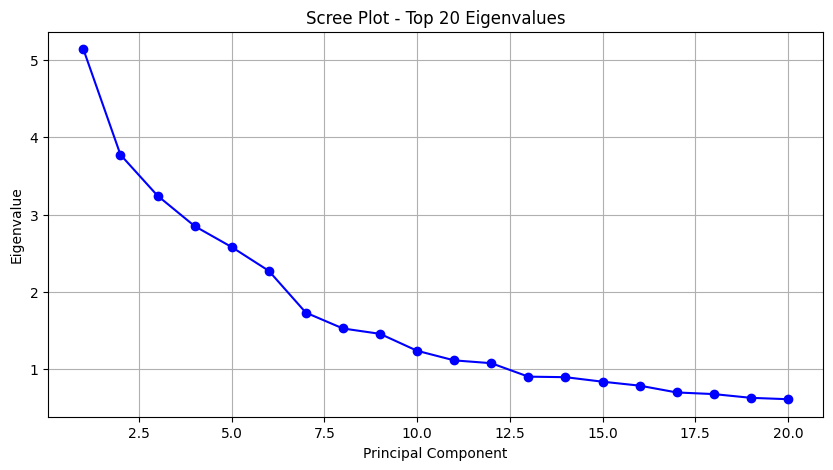

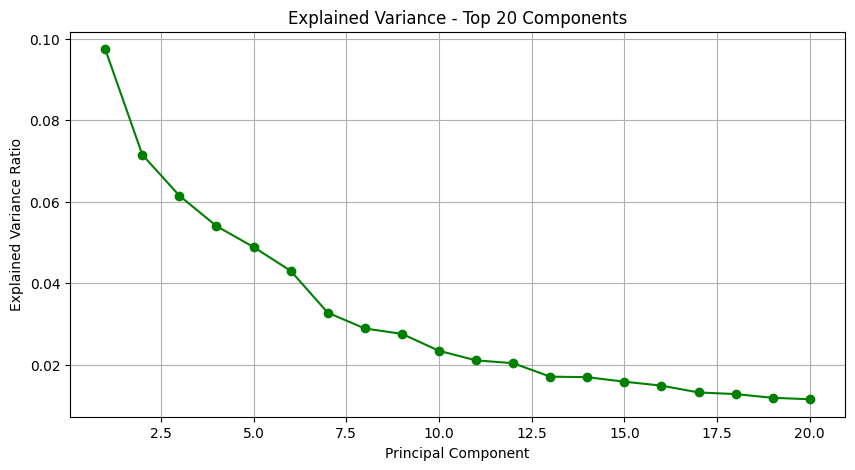

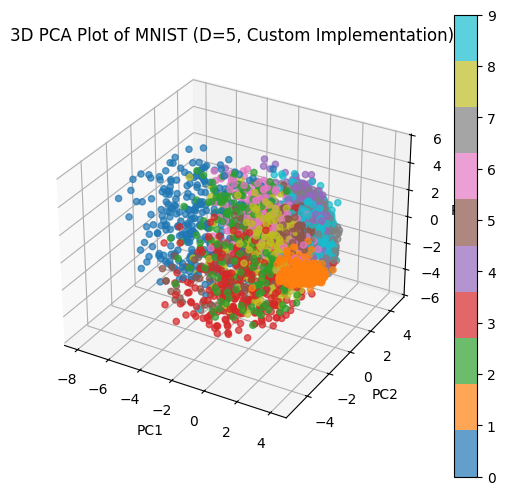

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), eigenvalues_20_custom[:20], marker='o', linestyle='-', color='b', label='Eigenvalues')
plt.title('Scree Plot - Top 20 Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), explained_variance_20_custom[:20], marker='o', linestyle='-', color='g', label='Explained Variance')
plt.title('Explained Variance - Top 20 Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(
    X_train_pca_5_custom.iloc[:3000, 0], 
    X_train_pca_5_custom.iloc[:3000, 1], 
    X_train_pca_5_custom.iloc[:3000, 2], 
    c=y[:3000], cmap='tab10', alpha=0.7
)


ax1.set_title("3D PCA Plot of MNIST (D=5, Custom Implementation)")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
fig.colorbar(scatter1, ax=ax1)



In [10]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_train_pca_5_custom, y, test_size=0.2, random_state=42, stratify=y)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_train_pca_20_custom, y, test_size=0.2, random_state=42, stratify=y)


print("Shape of X_train_5:", X_train_5.shape)
print("Shape of X_test_5:", X_test_5.shape)
print("Shape of X_train_20:", X_train_20.shape)
print("Shape of X_test_20:", X_test_20.shape)

log_reg_5 = LogisticRegression(max_iter=1000)
log_reg_5.fit(X_train_5, y_train_5)
y_pred_5_log_reg = log_reg_5.predict(X_test_5)
log_reg_5_accuracy = accuracy_score(y_test_5, y_pred_5_log_reg)
print(f"Logistic Regression Accuracy (D=5): {log_reg_5_accuracy:.4f}")

log_reg_20 = LogisticRegression(max_iter=1000)
log_reg_20.fit(X_train_20, y_train_20)
y_pred_20_log_reg = log_reg_20.predict(X_test_20)
log_reg_20_accuracy = accuracy_score(y_test_20, y_pred_20_log_reg)
print(f"Logistic Regression Accuracy (D=20): {log_reg_20_accuracy:.4f}")

dt_5 = DecisionTreeClassifier(random_state=42)
dt_5.fit(X_train_5, y_train_5)
y_pred_5_dt = dt_5.predict(X_test_5)
dt_5_accuracy = accuracy_score(y_test_5, y_pred_5_dt)
print(f"Decision Tree Accuracy (D=5): {dt_5_accuracy:.4f}")

dt_20 = DecisionTreeClassifier(random_state=42)
dt_20.fit(X_train_20, y_train_20)
y_pred_20_dt = dt_20.predict(X_test_20)
dt_20_accuracy = accuracy_score(y_test_20, y_pred_20_dt)
print(f"Decision Tree Accuracy (D=20): {dt_20_accuracy:.4f}")

Shape of X_train_5: (56000, 5)
Shape of X_test_5: (14000, 5)
Shape of X_train_20: (56000, 20)
Shape of X_test_20: (14000, 20)
Logistic Regression Accuracy (D=5): 0.6774
Logistic Regression Accuracy (D=20): 0.8765
Decision Tree Accuracy (D=5): 0.6726
Decision Tree Accuracy (D=20): 0.8463


## SKLearn PCA Implementation on MNIST Dataset

Top 5 Eigenvalues from sklearn PCA (D=5): [5.14100825 3.77444717 3.24383475 2.85024769 2.57887847]
Explained variance ratio from sklearn PCA (D=5): [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934]
Top 5 Eigenvalues from sklearn PCA (D=20): [5.14100825 3.77444717 3.24383475 2.85024769 2.57887847 2.27097726
 1.72926011 1.52426579 1.4550179  1.23546262 1.11126353 1.07479514
 0.90046453 0.89358363 0.8352231  0.78403658 0.69595241 0.67467111
 0.62627797 0.60816608]
Explained variance ratio from sklearn PCA (D=20): [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214  0.02106689 0.02037553
 0.01707064 0.0169402  0.01583382 0.01486345 0.01319358 0.01279014
 0.01187272 0.01152937]


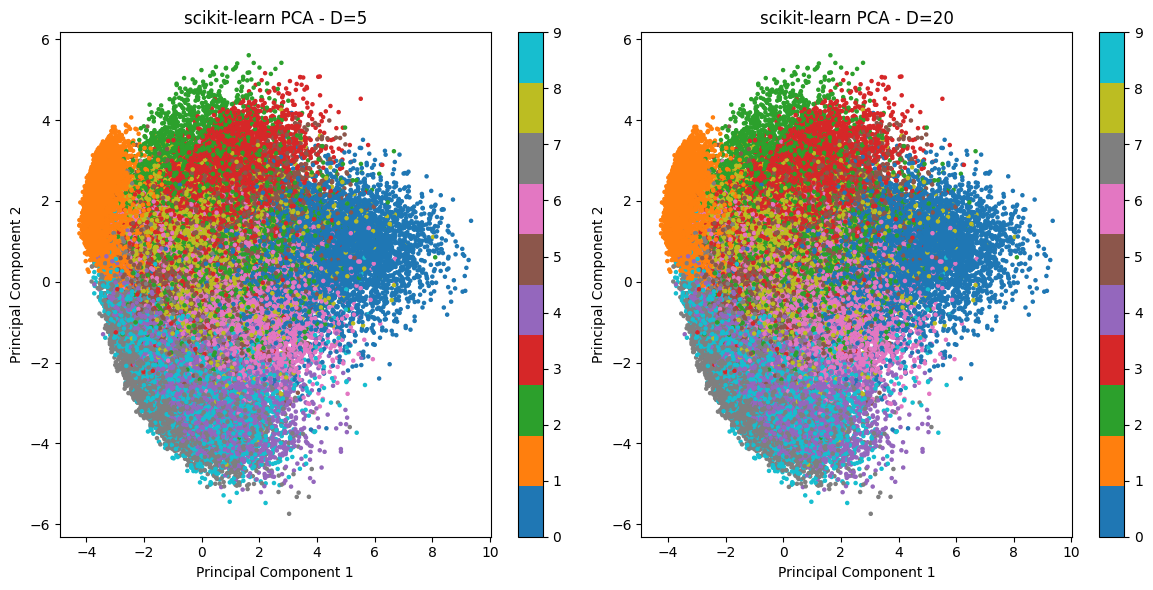

In [64]:
pca_sklearn_5 = sklearn_PCA(n_components=5)
X_train_pca_5_sklearn = pca_sklearn_5.fit_transform(X_centered)

pca_sklearn_20 = sklearn_PCA(n_components=20)
X_train_pca_20_sklearn = pca_sklearn_20.fit_transform(X_centered)

print("Top 5 Eigenvalues from sklearn PCA (D=5):", pca_sklearn_5.explained_variance_[:5])
print("Explained variance ratio from sklearn PCA (D=5):", pca_sklearn_5.explained_variance_ratio_[:5])

print("Top 5 Eigenvalues from sklearn PCA (D=20):", pca_sklearn_20.explained_variance_[:20])
print("Explained variance ratio from sklearn PCA (D=20):", pca_sklearn_20.explained_variance_ratio_[:20])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca_5_sklearn[:, 0], X_train_pca_5_sklearn[:, 1], c=y, cmap='tab10', s=5)
plt.title("scikit-learn PCA - D=5")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_train_pca_20_sklearn[:, 0], X_train_pca_20_sklearn[:, 1], c=y, cmap='tab10', s=5)
plt.title("scikit-learn PCA - D=20")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()

plt.tight_layout()
plt.show()
